In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
rings = "analysis/tot_rings.dat"
clusters = "Clusters/plottami.dat"

for alcool in ["1BO"]:
    path = f"/home/riccardo/Mixtures/Jobs/{alcool}"
    dic1 = [x for x in os.listdir(path)]

    dic2 = {}
    for value in dic1:
        with open(f"{path}/{value}/{clusters}", "r") as rg:
                items = rg.read().splitlines()
                items = list(map(int,items))
        dic2[value] = items

    rings_to_count = {x:[] for x in range(3,9)}    
     

    for mix in sorted (dic2.keys()):
   
        for n,r in rings_to_count.items():
            n_mol = 400-400*float(mix)
            counter = dic2[mix].count(n)/n_mol*n
            #print(f"We have {counter}% molecules in {n} m-rings on the mixture {mix}DBE")
            rings_to_count[n].append(counter)
        
    xax = np.array([0.00,0.125,0.25,0.375,0.50,0.625,0.75,0.88,0.94])
    for x in rings_to_count.keys():
        while x < 6:
            plt.plot(xax,rings_to_count[x], label = f"{x}m-cluster", marker = "o")
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.01),ncol=3, fancybox=True, shadow=True)
        
        plt.xlim(0,1)
        plt.ylim(0,24.5)
        
        plt.title(f"Fraction of {alcool} Molecules in Different Clusters")
        plt.xlabel("x$_{DBE}$")
        plt.ylabel(f"{alcool} molecules in Clusters (%)")
        plt.savefig(f"/home/riccardo/Mixtures/Figures/Clust_An/{alcool}_faction_Clusters.svg", format='svg', dpi=1200)

##### 

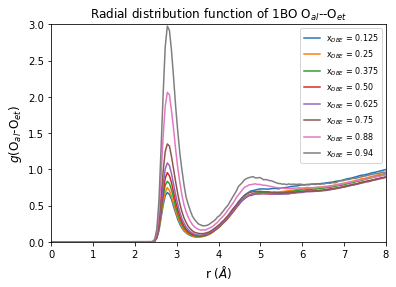

In [52]:
import os 
import numpy as np
import matplotlib.pyplot as plt


for alcool in ["1BO"]:
    path1 = f"/home/riccardo/Mixtures/Jobs/{alcool}"
    
    dicter = {b:[] for b in os.listdir(path1)}
    
    for f in os.listdir(path1):
        dicter[f] = np.loadtxt(f"{path1}/{f}/rdf_OaOe.dat")

    del dicter["0.00"]    
    for f,s in sorted (dicter.items()):
        dicter[f] = s
        plt.plot(s[:,0],s[:,1], label = "x$_{DBE}$ = "f"{f}")
    
    SMALL_SIZE = 8
    MEDIUM_SIZE = 12
    plt.rc('axes', labelsize=MEDIUM_SIZE)
    plt.rc('legend', fontsize=SMALL_SIZE)
    
    plt.title(f"Radial distribution function of {alcool}"" O$_{al}$--O$_{et}$")
    plt.xlabel("r ($\AA$)")
    plt.ylabel("$g$(O$_{al}$-O$_{et}$)")
    plt.legend()    
    plt.xlim(0,8)
    plt.ylim(0,3)
    plt.savefig(f"/home/riccardo/Mixtures/Figures/RDF/{alcool}_rdf_OaOe.svg", format='svg', dpi=1200)    

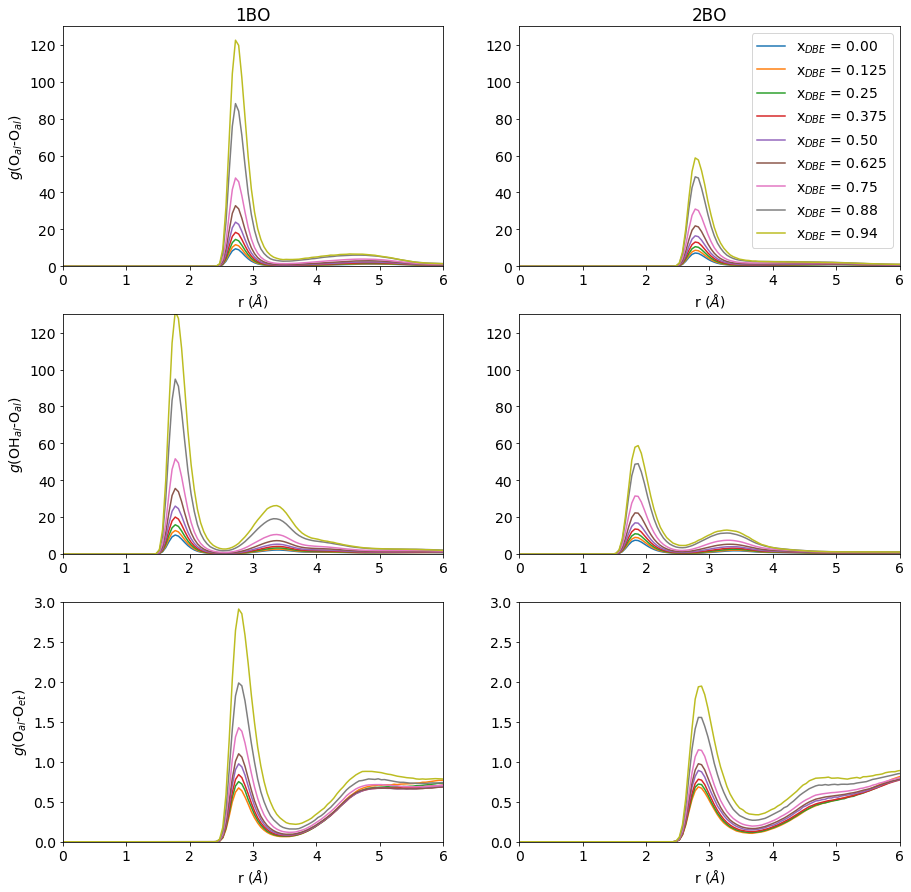

In [3]:
import os 
import numpy as np
import matplotlib.pyplot as plt


path1 = "D:/TESI_DATI/RDF"

#Reading RDF OO
dicter_1bo = {b:[] for b in os.listdir(f"{path1}/1BO")}
dicter_2bo = {b:[] for b in os.listdir(f"{path1}/2BO")}

for f in os.listdir(f"{path1}/1BO"):
        dicter_1bo[f] = np.loadtxt(f"{path1}/1BO/{f}/rdf_OO.dat")
        
for f in os.listdir(f"{path1}/2BO"):
        dicter_2bo[f] = np.loadtxt(f"{path1}/2BO/{f}/rdf_OO.dat")

#Reading RDF OH
dicter_1boH = {b:[] for b in os.listdir(f"{path1}/1BO")}
dicter_2boH = {b:[] for b in os.listdir(f"{path1}/2BO")}

for f in os.listdir(f"{path1}/1BO"):
        dicter_1boH[f] = np.loadtxt(f"{path1}/1BO/{f}/rdf_OH.dat")
        
for f in os.listdir(f"{path1}/2BO"):
        dicter_2boH[f] = np.loadtxt(f"{path1}/2BO/{f}/rdf_OH.dat")        
        
#Reading RDF OaOe        
dicter_1boE = {b:[] for b in os.listdir(f"{path1}/1BO")}
dicter_2boE = {b:[] for b in os.listdir(f"{path1}/2BO")}

for f in os.listdir(f"{path1}/1BO"):
        dicter_1boE[f] = np.loadtxt(f"{path1}/1BO/{f}/rdf_OaOe.dat")
        
for f in os.listdir(f"{path1}/2BO"):
        dicter_2boE[f] = np.loadtxt(f"{path1}/2BO/{f}/rdf_OaOe.dat")        
plt.rc('font', size=14)        
plt.subplots(3,2,figsize=(15,15))        
plt.subplot(321)        
for f,s in sorted (dicter_1bo.items()):
        dicter_1bo[f] = s
        plt.plot(s[:,0],s[:,1], label = "x$_{DBE}$ = "f"{f}")
        plt.title("1BO")
        plt.ylabel("$g$(O$_{al}$-O$_{al}$)")
        #plt.legend()    
        plt.xlim(0,6)
        plt.ylim(0,130)
        plt.xlabel("r ($\AA$)")
        
plt.subplot(322)        
for f,s in sorted (dicter_2bo.items()):
        dicter_2bo[f] = s
        plt.plot(s[:,0],s[:,1], label = "x$_{DBE}$ = "f"{f}")
        plt.title("2BO")
        plt.xlim(0,6)
        plt.ylim(0,130)
        plt.legend()
        plt.xlabel("r ($\AA$)")
        
plt.subplot(323)        
for f,s in sorted (dicter_1boH.items()):
        dicter_1bo[f] = s
        plt.plot(s[:,0],s[:,1], label = "x$_{DBE}$ = "f"{f}")
        #plt.xlabel("r ($\AA$)")
        plt.ylabel("$g$(OH$_{al}$-O$_{al}$)")
        #plt.legend()    
        plt.xlim(0,6)
        plt.ylim(0,130)
        
        
plt.subplot(324)        
for f,s in sorted (dicter_2boH.items()):
        dicter_2bo[f] = s
        plt.plot(s[:,0],s[:,1], label = "x$_{DBE}$ = "f"{f}")
        #plt.xlabel("r ($\AA$)")
        plt.xlim(0,6)
        plt.ylim(0,130)
        #plt.legend()

plt.subplot(325)
plt.plot(0,0)
del dicter_1boE["0.00"]
for f,s in sorted (dicter_1boE.items()):
        dicter_1bo[f] = s
        plt.plot(s[:,0],s[:,1], label = "x$_{DBE}$ = "f"{f}")
        plt.xlabel("r ($\AA$)")
        plt.ylabel("$g$(O$_{al}$-O$_{et}$)")
        #plt.legend()    
        plt.xlim(0,6)
        plt.ylim(0,3)
        
del dicter_2boE["0.00"]         
plt.subplot(326)
plt.plot(0,0)
for f,s in sorted (dicter_2boE.items()):
        dicter_2bo[f] = s
        plt.plot(s[:,0],s[:,1], label = "x$_{DBE}$ = "f"{f}")
        plt.xlabel("r ($\AA$)")
        plt.xlim(0,6)
        plt.ylim(0,3)
        #plt.legend()
        

plt.savefig("C:/Users/r.farris10/Dropbox/Mixtures_2019/TesiFinaleChePunisceIDisonesti/fig/plot/rdf.png", format='png', dpi=1200)

([<matplotlib.axis.XTick at 0x7fa583712cd0>,
 <a list of 10 Text xticklabel objects>)

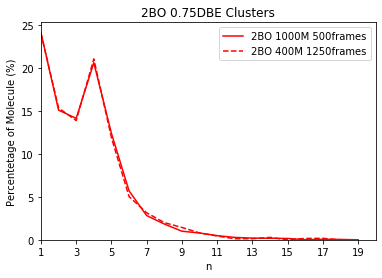

In [18]:
D:\TESI_DATI\RDF\2BO\0.00
import numpy as np
import matplotlib.pyplot as plt


cluster_1bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/1000M/2BO/Clusters_500/plottami.dat")
cluster_2bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/2BO/0.75/Clusters_100/plottami.dat")

#cluster_1bo_small = np.loadtxt("/home/riccardo/Mixtures/Jobs/1000M/1BO/100_Clusters/plottami.dat")
#ring_1bo_small = np.loadtxt("/home/riccardo/Mixtures/Jobs/1000M/1BO/100_analysis/tot_rings.dat")

#ring_1bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/1000M/1BO/analysis/tot_rings.dat")
#ring_2bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/1000M/2BO/analysis/tot_rings.dat")

cluster_count_1bo = {x:[] for x in range(1,1001)} 
cluster_count_2bo = {x:[] for x in range(1,1001)} 

y_1bo_big = []
y_2bo_big = []
x_ax = [x for x in range(1,20)]
for tot_n_clust in x_ax:
    tot_clust = np.count_nonzero(cluster_1bo == tot_n_clust)
    y_1bo_big.append(tot_clust*tot_n_clust/500*100/250)
    
    tot_clust = np.count_nonzero(cluster_2bo == tot_n_clust)
    y_2bo_big.append(tot_clust*tot_n_clust/100)

    
plt.plot(x_ax,np.transpose(y_1bo_big), "r", label = "2BO 1000M 500frames")
plt.plot(x_ax,np.transpose(y_2bo_big), "r--", label = "2BO 400M 1250frames")

plt.title("2BO 0.75DBE Clusters")
plt.xlabel("n")
plt.ylabel("Percentetage of Molecule (%)")
plt.legend()

plt.xlim(1,20)
plt.ylim(0,)
plt.xticks(np.arange(1, 20, step=2))

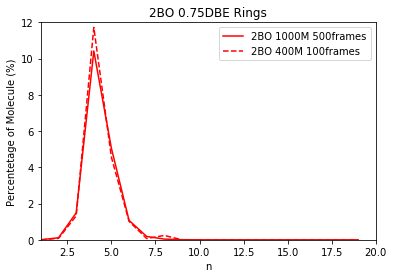

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#cluster_1bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/1BO/0.75/Clusters/plottami.dat")
#cluster_2bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/2BO/0.75/Clusters/plottami.dat")

ring_1bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/1000M/2BO/analysis_500/tot_rings.dat")
ring_2bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/2BO/0.75/analysis_100/tot_rings.dat")

cluster_count_1bo = {x:[] for x in range(1,1001)} 
cluster_count_2bo = {x:[] for x in range(1,1001)} 

y_1bo = []
y_2bo = []
x_ax = [x for x in range(1,20)]
for tot_n_clust in x_ax:
    tot_clust = np.count_nonzero(ring_1bo == tot_n_clust)
    y_1bo.append(tot_clust*tot_n_clust/500*100/250)
    
    tot_clust = np.count_nonzero(ring_2bo == tot_n_clust)
    y_2bo.append(tot_clust*tot_n_clust/100)

plt.title("2BO 0.75DBE Rings")    
plt.plot(x_ax,np.transpose(y_1bo), "r", label = "2BO 1000M 500frames")
plt.plot(x_ax,np.transpose(y_2bo), "r--", label = "2BO 400M 100frames")
#plt.plot(x_ax,np.transpose(y_1bo_big), "b--", label = "1BO_big")
#plt.plot(x_ax,np.transpose(y_2bo_big), "r--", label = "2BO_big")
plt.xlabel("n")
plt.ylabel("Percentetage of Molecule (%)")
plt.legend()

plt.xlim(1,20)
plt.ylim(0,12)
plt.savefig(f"/home/riccardo/Dropbox/Mixtures_2019/Paper-Riccardo/Figures/Rings_small_big.svg", format='svg', dpi=1200)

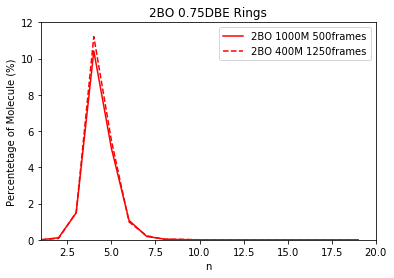

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#cluster_1bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/1BO/0.75/Clusters/plottami.dat")
#cluster_2bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/2BO/0.75/Clusters/plottami.dat")

ring_1bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/1000M/2BO/analysis_500/tot_rings.dat")
ring_2bo = np.loadtxt("/home/riccardo/Mixtures/Jobs/2BO/0.75/analysis_1250/tot_rings.dat")

cluster_count_1bo = {x:[] for x in range(1,1001)} 
cluster_count_2bo = {x:[] for x in range(1,1001)} 

y_1bo = []
y_2bo = []
x_ax = [x for x in range(1,20)]
for tot_n_clust in x_ax:
    tot_clust = np.count_nonzero(ring_1bo == tot_n_clust)
    y_1bo.append(tot_clust*tot_n_clust/500*100/250)
    
    tot_clust = np.count_nonzero(ring_2bo == tot_n_clust)
    y_2bo.append(tot_clust*tot_n_clust/1250)

plt.title("2BO 0.75DBE Rings")    
plt.plot(x_ax,np.transpose(y_1bo), "r", label = "2BO 1000M 500frames")
plt.plot(x_ax,np.transpose(y_2bo), "r--", label = "2BO 400M 1250frames")
#plt.plot(x_ax,np.transpose(y_1bo_big), "b--", label = "1BO_big")
#plt.plot(x_ax,np.transpose(y_2bo_big), "r--", label = "2BO_big")
plt.xlabel("n")
plt.ylabel("Percentetage of Molecule (%)")
plt.legend()

plt.xlim(1,20)
plt.ylim(0,12)
plt.savefig(f"/home/riccardo/Dropbox/Mixtures_2019/Paper-Riccardo/Figures/Rings_small_big.svg", format='svg', dpi=1200)

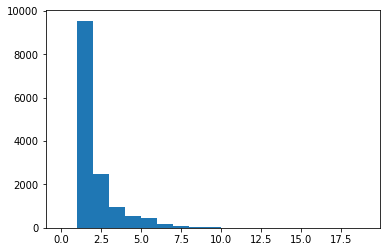

In [19]:
import numpy as np
import matplotlib.pyplot as plt

ring_1bo = np.loadtxt("D:/TESI_DATI/Cluster_Analisi/1BO/0.94/1000_frames/plottami.dat")

fig, ax =plt.subplots()
ax.hist(ring_1bo,np.arange(20))

plt.show()


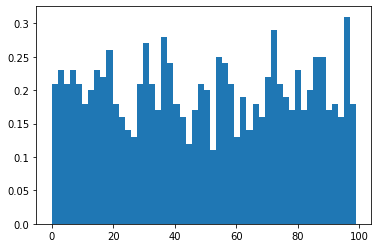

In [4]:
np.random.seed(10)
values= np.random.randint(0,100,1000)
#change y_axis values
fig, ax =plt.subplots()
ax.hist(values,50)
y_values = ax.get_yticks()#get y_values
ax.set_yticklabels(['{:}'.format(x/100)for x in y_values]) #divide each y value by 100
plt.show()